In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/Helper Functions')

Mounted at /content/gdrive/


In [2]:
from collections import deque

* A tree is a `nonlinear data structure with hierarchial relationships` with its elements without having any cycle
* Linear data structures store data sequentially, time complexity increases linearly with size of data
* Each node has `Data` and `Link to sub-category`


## Tree Terminologies

* Root - Top node w/o parent
* Edge- Link b/w parent and children node
* Leaf- Node w/o any children
* Sibling- Node with same parent
* Ancestors - Parent, Grandparent, Greatgrandparent of a node
* Depth of Node- Length of path from root to node
* Height of Node- Length of path from node to deepest node of tree
* Depth of tree- Depth of root node (0 always)
* Height of tree- Height of root node


In [3]:
#implementing a simple tree from DSA course

class TreeNode:
	def __init__(self, data, children=[]):
		self.data= data
		self.children=children

	def __str__(self, level=0):
		ret= "  "*level+str(self.data)+"\n"
		for child in self.children:
			ret+=child.__str__(level+1)
		return ret
	
	def addChild(self, TreeNode):
		self.children.append(TreeNode)


tree= TreeNode('Drinks', [])
cold= TreeNode('Cold', [])
hot= TreeNode('Hot', [])

tree.addChild(cold)
tree.addChild(hot)


tea= TreeNode('Tea', [])
coffee = TreeNode('Coffee', [])
hot.addChild(tea)
hot.addChild(coffee)

cola= TreeNode('Cola', [])
fanta= TreeNode('Fanta', [])
cold.addChild(cola)
cold.addChild(fanta)


 
print(tree)

Drinks
  Cold
    Cola
    Fanta
  Hot
    Tea
    Coffee



## Binary Trees


* Each tree has atmost two children, often referred to as the left and right children

### Types of Binary Tree


* Full Binary Tree- Each node has either two children or zero children
* Perfect Binary Tree-  All non-leaf node have two children and they are at the same depth
* Complete Binary Tree- Completely filled at all levels except at leaf level (only leftmost nodes are filled)
* Balanced Binary Tree- All leaf nodes are located at same height from the root

### Binary Trees implementation using LinkedList
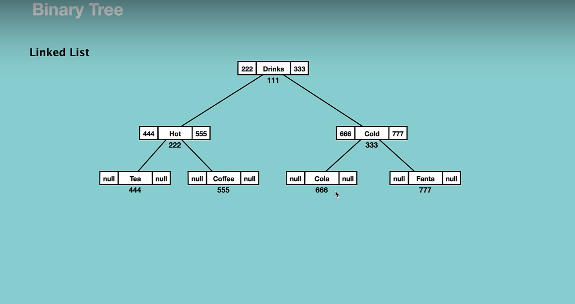

### Binary Trees implementation using Python list
* Left Child= cell[2x]
* Right Child = cell[2x+1]
Where `x` is the root node physical location
* *First index `0` is left blank in this implementation*

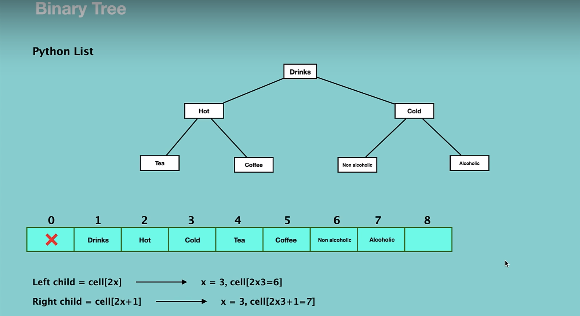


## Binary trees LinkedList
* Creation
* Insertion of node
* Search for a node
* Deletion of node
* Traversal
* Delete entire node


### Creation

In [4]:
# LinkedList implementation

#Creation 
#O(1) space and time complexity 
class treeNode:
	def __init__(self, data):
		self.data= data
		self.leftChild= None
		self.rightChild= None

In [5]:
newBT= treeNode("Drinks")
leftChild= treeNode("Hot")
rightChild = treeNode("Cold")
tea=treeNode("Tea")
coffee= treeNode("Coffee")
leftChild.leftChild=tea
leftChild.rightChild=coffee
sprite=treeNode("Sprite")
fanta=treeNode("Faaaaaanta")
rightChild.leftChild=sprite
rightChild.rightChild=fanta
newBT.leftChild = leftChild
newBT.rightChild = rightChild

### Traversal 
* Depth first search
 * Preorder
   * (Root-->LeftSubtree-->RightSubtree)
 * Inorder
   * (LeftSubtree-->Root-->RightSubtree)
 * Postorder
   * (LeftSubtree-->RightSubtree-->Root)
*Breadth first search
  * Levelorder

#### PreOrder
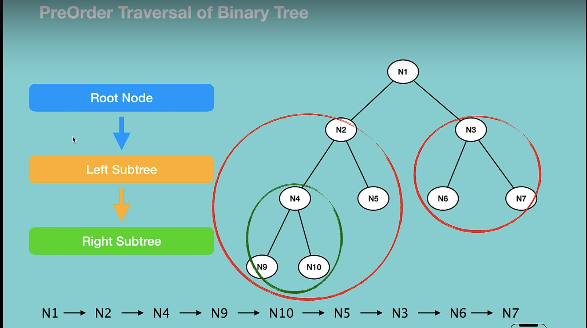

In [6]:
#Traversal
#Preorder (rootNode--> leftSubtree--> rightSubtree)
# O(n) time complexity and space complexity is O(n)
def preTrav(rootNode):
	if not rootNode:
		return
	print(rootNode.data)
	preTrav(rootNode.leftChild)
	preTrav(rootNode.rightChild)

In [7]:
preTrav(newBT)

Drinks
Hot
Tea
Coffee
Cold
Sprite
Faaaaaanta


#### InOrder Traversal
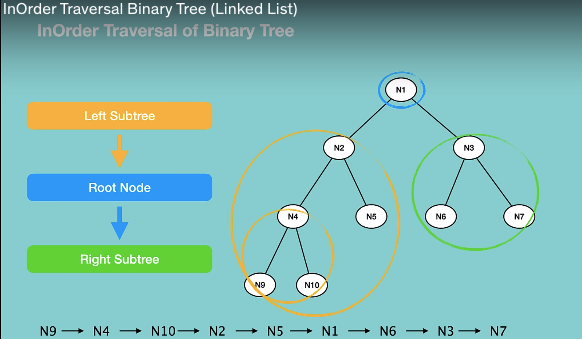

In [8]:
#Inorder (leftSubtree-->rootNode-->rightSubtree)
#O(n) time complexity and O(n) space complexity; because stack memory
def inOrderTraversal(rootNode):
	if not rootNode:
		return
	inOrderTraversal(rootNode.leftChild)
	print(rootNode.data)
	inOrderTraversal(rootNode.rightChild)

In [9]:
inOrderTraversal(newBT)

Tea
Hot
Coffee
Drinks
Sprite
Cold
Faaaaaanta


#### PostOrderTraversal

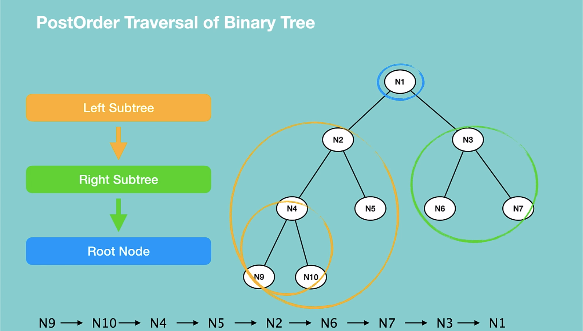

In [10]:
#O(n) time and space complexity, because we are inserting values to stack memory
def postOrderTraversal(rootNode):
	if not rootNode:
		return
	postOrderTraversal(rootNode.leftChild)
	postOrderTraversal(rootNode.rightChild)
	print(rootNode.data)

In [11]:
postOrderTraversal(newBT)

Tea
Coffee
Hot
Sprite
Faaaaaanta
Cold
Drinks


#### levelOrder Traversal


In [12]:


def levelOrderTraversal(rootNode):
  if not rootNode:
    return
  else:
    customQueue= deque()
    customQueue.append(rootNode)
    while len(customQueue)>0:
      root= customQueue.popleft()
      print(root.data)
      if root.leftChild is not None:
        customQueue.append(root.leftChild)
      if root.rightChild is not None:
        customQueue.append(root.rightChild)


In [13]:
levelOrderTraversal(newBT)

Drinks
Hot
Cold
Tea
Coffee
Sprite
Faaaaaanta


### Search for Node in Binary Tree

*Space and Time complexity is O(N)


In [14]:
def searchNodeBT(rootNode, nodeValue):
	#we will use levelOrderTraversal
  if not rootNode:
    return "Binary Tree does not exist"
  else:
    customQueue= deque()
    customQueue.append(rootNode)
    while len(customQueue)>0:
      node= customQueue.popleft()
      if node.data == nodeValue:
        return "Node exists in Binary Tree"
      if node.leftChild is not None:
        customQueue.append(node.leftChild)
      if node.rightChild is not None:
        customQueue.append(node.rightChild)
    return "Node does not exist in Binary Tree "

In [15]:
print(searchNodeBT(newBT, "Tea"))



Node exists in Binary Tree


In [16]:

print(searchNodeBT(newBT, "Cola"))

Node does not exist in Binary Tree 


### Insert a node in a Binary Tree

* If root does not exist, insert the root
* If root does exist, look for the first vacant place
* Insertion happens at first vacant node given by `levelOrderTraversal`
* Time and Space complexity is O(N)

In [17]:
def insertNode(rootNode, newNode):
	 if not rootNode:
	 	rootNode= newNode
	 else:
	 	customQueue= deque()
	 	customQueue.append(rootNode)
	 	while len(customQueue)>0:
	 		root= customQueue.popleft()
	 		if root.leftChild is not None:
	 			customQueue.append(root.leftChild)
	 		else:
	 			root.leftChild = newNode
	 			return "Successfully inserted"
	 		if root.rightChild is not None:
	 			customQueue.append(root.rightChild)
	 		else:
	 			root.rightChild= newNode
	 			return "Successfully inserted"


In [18]:
newNode= treeNode("DarjeelingTea")
print(insertNode(newBT, newNode))
print('\n')
levelOrderTraversal(newBT)

Successfully inserted


Drinks
Hot
Cold
Tea
Coffee
Sprite
Faaaaaanta
DarjeelingTea


### Deleting a node in Binary Tree
* The node to be deleted is simply replaced with the deepest node of the Binary Tree because a node cannot simply be deleted from in between a binary tree
* Three methods- Get deepest node, delete deepest node, replace the node to be deleted with deepest node
* Time and Space complexity is O(N)

In [19]:
def getDeepestNode(rootNode):
	if not rootNode:
		return
	else:
		customQueue= deque()
		customQueue.append(rootNode)
		while len(customQueue)>0:
			root = customQueue.popleft()
			if root.leftChild is not None:
				customQueue.append(root.leftChild)
			if root.rightChild is not None:
				customQueue.append(root.rightChild)
		deepestNode= root
		return deepestNode

def deleteDeepestNode(rootNode, deepestNode):
	if not rootNode:
		return 
	else:
		customQueue= deque()
		customQueue.append(rootNode)
		while len(customQueue)>0:
			root= customQueue.popleft()
			if root.data== deepestNode:
				root.data= None
				return
			if root.rightChild is not None:
				if root.rightChild == deepestNode:
					root.rightChild = None 
					return
				else:
					customQueue.append(rightChild)
			if root.leftChild is not None:
				if root.leftChild is deepestNode:
					root.leftChild = None
					return 
				else:
					customQueue.append(root.leftChild)

In [20]:

#deleteDeepestNode(newBT, deepestNode)
#levelOrderTraversal(newBT)

In [21]:
def deleteNodeBT(rootNode, node):
	if not rootNode:
		return "Binary Tree does not exist"
	else:
		customQueue = deque()
		customQueue.append(rootNode)
		while len(customQueue)>0:
			root= customQueue.popleft()
			if root.data == node:
				dNode= getDeepestNode(rootNode)
				root.data = dNode.data
				deleteDeepestNode(rootNode, dNode)
				return "Node has been successfully deleted"
			if root.rightChild is not None:
				customQueue.append(root.rightChild)
			if root.leftChild is not None:
				customQueue.append(root.leftChild)
		return "Failed to delete node from given Binary Tree "

In [22]:
print(deleteNodeBT(newBT, 'Tea'))
levelOrderTraversal(newBT)

Node has been successfully deleted
Drinks
Hot
Cold
DarjeelingTea
Coffee
Sprite
Faaaaaanta


### Delete entire Binary Tree

* Time and Space complexity is O(1)

In [23]:
def deleteEntireBinaryTree(rootNode):
	if not rootNode:
		return "BT does not exist"
	else:
		rootNode.rightChild=None
		rootNode.leftChild = None 
		rootNode.data=None
		return "BT successfully deleted"

In [24]:
deleteEntireBinaryTree(newBT)
levelOrderTraversal(newBT)

None


## Binary Tree using Python Lists

* Parameters that are being initialised are a customList, lastUsedIndex and maxSize of the Binary Trees
* Creation takes O(1) time complexity and O(N) space complexity because of the list


### Insertion of Node in Binary Tree (using List)
* Time Complexity is O(1) and space complexity is O(1) as well


In [25]:
class BinaryTrees:
	def __init__(self, size):
		self.customList= size*[None]
		self.lastUsedIndex= 0
		self.maxSize= size

	def insertNode(self, value):
		if self.lastUsedIndex +1 == self.maxSize:
			return "Binary Tree is full"
		self.customList[self.lastUsedIndex+1]= value
		self.lastUsedIndex+=1
		return "Value has been successfully inserted"

In [26]:
newBT= BinaryTrees(8)
newBT.insertNode("Drinks")
newBT.insertNode("Hot")
newBT.insertNode("Cold")
newBT.insertNode("Tea")
newBT.insertNode("Coffee")
newBT.insertNode("Sprite")
newBT.insertNode("Fanta")


'Value has been successfully inserted'

### Search for Node in BT

* Time complexity is O(N)

In [27]:
#Python list implementation of Binary Trees


class BinaryTrees:
	def __init__(self, size):
		self.customList= size*[None]
		self.lastUsedIndex= 0
		self.maxSize= size

	def insertNode(self, value):
		if self.lastUsedIndex +1 == self.maxSize:
			return "Binary Tree is full"
		self.customList[self.lastUsedIndex+1]= value
		self.lastUsedIndex+=1
		return "Value has been successfully inserted"
	def searchNode(self, nodeValue):
		for i in range(len(self.customList)):
			if self.customList[i]==nodeValue:
				return "Successfully found in Binary Trees"
			return "Not Found"

In [28]:
newBT= BinaryTrees(8)
newBT.insertNode("Drinks")
newBT.insertNode("Hot")
newBT.insertNode("Cold")
newBT.insertNode("Tea")
newBT.insertNode("Coffee")
newBT.insertNode("Sprite")
newBT.insertNode("Fanta")

print(newBT.searchNode("DarjeelingTea"))


Not Found


### Traversal

#### PreOrderTraversal
* Time and Space complexity are O(N)


In [29]:
#Python list implementation of Binary Trees


class BinaryTrees:
	def __init__(self, size):
		self.customList= size*[None]
		self.lastUsedIndex= 0
		self.maxSize= size

	def insertNode(self, value):
		if self.lastUsedIndex +1 == self.maxSize:
			return "Binary Tree is full"
		self.customList[self.lastUsedIndex+1]= value
		self.lastUsedIndex+=1
		return "Value has been successfully inserted"
	def searchNode(self, nodeValue):
		for i in range(len(self.customList)):
			if self.customList[i]==nodeValue:
				return "Successfully found in Binary Trees"
			return "Not Found"

	def preOrderTraversal(self, index):
		if index > self.lastUsedIndex:
			return
		print(self.customList[index])
		self.preOrderTraversal(index*2)
		self.preOrderTraversal(index*2+1)





newBT= BinaryTrees(8)
newBT.insertNode("Drinks")
newBT.insertNode("Hot")
newBT.insertNode("Cold")
newBT.insertNode("Tea")
newBT.insertNode("Coffee")
newBT.insertNode("Sprite")
newBT.insertNode("Fanta")


newBT.preOrderTraversal(1)


Drinks
Hot
Tea
Coffee
Cold
Sprite
Fanta


#### InOrder Traversal

* Time and Space complexity are O(N)


In [30]:
#Python list implementation of Binary Trees


class BinaryTrees:
	def __init__(self, size):
		self.customList= size*[None]
		self.lastUsedIndex= 0
		self.maxSize= size

	def insertNode(self, value):
		if self.lastUsedIndex +1 == self.maxSize:
			return "Binary Tree is full"
		self.customList[self.lastUsedIndex+1]= value
		self.lastUsedIndex+=1
		return "Value has been successfully inserted"
	def searchNode(self, nodeValue):
		for i in range(len(self.customList)):
			if self.customList[i]==nodeValue:
				return "Successfully found in Binary Trees"
			return "Not Found"

	def preOrderTraversal(self, index):
		if index > self.lastUsedIndex:
			return
		print(self.customList[index])
		self.preOrderTraversal(index*2)
		self.preOrderTraversal(index*2+1)


	def inOrderTraversal(self, index):
		 if index > self.lastUsedIndex:
		 	return
		 self.inOrderTraversal(index*2)
		 print(self.customList[index])
		 self.inOrderTraversal(index*2+1)



newBT= BinaryTrees(8)
newBT.insertNode("Drinks")
newBT.insertNode("Hot")
newBT.insertNode("Cold")
newBT.insertNode("Tea")
newBT.insertNode("Coffee")
newBT.insertNode("Sprite")
newBT.insertNode("Fanta")


print('\n')
newBT.inOrderTraversal(1)





Tea
Hot
Coffee
Drinks
Sprite
Cold
Fanta


#### PostOrder Traversal

* Time and Space complexity is O(N)

In [32]:
#Python list implementation of Binary Trees


class BinaryTrees:
	def __init__(self, size):
		self.customList= size*[None]
		self.lastUsedIndex= 0
		self.maxSize= size

	def insertNode(self, value):
		if self.lastUsedIndex +1 == self.maxSize:
			return "Binary Tree is full"
		self.customList[self.lastUsedIndex+1]= value
		self.lastUsedIndex+=1
		return "Value has been successfully inserted"
	def searchNode(self, nodeValue):
		for i in range(len(self.customList)):
			if self.customList[i]==nodeValue:
				return "Successfully found in Binary Trees"
			return "Not Found"

	def preOrderTraversal(self, index):
		if index > self.lastUsedIndex:
			return
		print(self.customList[index])
		self.preOrderTraversal(index*2)
		self.preOrderTraversal(index*2+1)


	def inOrderTraversal(self, index):
		 if index > self.lastUsedIndex:
		 	return
		 self.inOrderTraversal(index*2)
		 print(self.customList[index])
		 self.inOrderTraversal(index*2+1)

	def postOrderTraversal(self, index):
		if index>self.lastUsedIndex:
			return
		self.postOrderTraversal(index*2)
		self.postOrderTraversal(index*2+1)
		print(self.customList[index])



newBT= BinaryTrees(8)
newBT.insertNode("Drinks")
newBT.insertNode("Hot")
newBT.insertNode("Cold")
newBT.insertNode("Tea")
newBT.insertNode("Coffee")
newBT.insertNode("Sprite")
newBT.insertNode("Fanta")



print('\n')
newBT.postOrderTraversal(1)



Tea
Coffee
Hot
Sprite
Fanta
Cold
Drinks


#### LevelOrder Traversal
* Time complexity is O(N) and Space complexity is O(1)

In [33]:
#Python list implementation of Binary Trees


class BinaryTrees:
	def __init__(self, size):
		self.customList= size*[None]
		self.lastUsedIndex= 0
		self.maxSize= size

	def insertNode(self, value):
		if self.lastUsedIndex +1 == self.maxSize:
			return "Binary Tree is full"
		self.customList[self.lastUsedIndex+1]= value
		self.lastUsedIndex+=1
		return "Value has been successfully inserted"
	def searchNode(self, nodeValue):
		for i in range(len(self.customList)):
			if self.customList[i]==nodeValue:
				return "Successfully found in Binary Trees"
			return "Not Found"

	def preOrderTraversal(self, index):
		if index > self.lastUsedIndex:
			return
		print(self.customList[index])
		self.preOrderTraversal(index*2)
		self.preOrderTraversal(index*2+1)


	def inOrderTraversal(self, index):
		 if index > self.lastUsedIndex:
		 	return
		 self.inOrderTraversal(index*2)
		 print(self.customList[index])
		 self.inOrderTraversal(index*2+1)

	def postOrderTraversal(self, index):
		if index>self.lastUsedIndex:
			return
		self.postOrderTraversal(index*2)
		self.postOrderTraversal(index*2+1)
		print(self.customList[index])

	def levelOrderTraversal(self, index):
		if index>self.lastUsedIndex:
			return
		for i in range(index, self.lastUsedIndex+1):
			print(self.customList[i])





newBT= BinaryTrees(8)
newBT.insertNode("Drinks")
newBT.insertNode("Hot")
newBT.insertNode("Cold")
newBT.insertNode("Tea")
newBT.insertNode("Coffee")
newBT.insertNode("Sprite")
newBT.insertNode("Fanta")

print('\n')
newBT.levelOrderTraversal(1)



Drinks
Hot
Cold
Tea
Coffee
Sprite
Fanta


### Delete Node from Binary Tree (Python list)

* Space complexity is O(1) and time complexity is O(N)


In [34]:
#Python list implementation of Binary Trees


class BinaryTrees:
	def __init__(self, size):
		self.customList= size*[None]
		self.lastUsedIndex= 0
		self.maxSize= size

	def insertNode(self, value):
		if self.lastUsedIndex +1 == self.maxSize:
			return "Binary Tree is full"
		self.customList[self.lastUsedIndex+1]= value
		self.lastUsedIndex+=1
		return "Value has been successfully inserted"
	def searchNode(self, nodeValue):
		for i in range(len(self.customList)):
			if self.customList[i]==nodeValue:
				return "Successfully found in Binary Trees"
			return "Not Found"

	def preOrderTraversal(self, index):
		if index > self.lastUsedIndex:
			return
		print(self.customList[index])
		self.preOrderTraversal(index*2)
		self.preOrderTraversal(index*2+1)


	def inOrderTraversal(self, index):
		 if index > self.lastUsedIndex:
		 	return
		 self.inOrderTraversal(index*2)
		 print(self.customList[index])
		 self.inOrderTraversal(index*2+1)

	def postOrderTraversal(self, index):
		if index>self.lastUsedIndex:
			return
		self.postOrderTraversal(index*2)
		self.postOrderTraversal(index*2+1)
		print(self.customList[index])

	def levelOrderTraversal(self, index):
		if index>self.lastUsedIndex:
			return
		for i in range(index, self.lastUsedIndex+1):
			print(self.customList[i])
	def deleteNode(self, value):
		if self.lastUsedIndex ==0:
			return
		for i in range(1, self.lastUsedIndex+1):
			if self.customList[i]== value:
				self.customList[i]= self.customList[self.lastUsedIndex]
				self.customList[self.lastUsedIndex]= None
				self.lastUsedIndex-=1 
				return "Node has been successfully deleted"






newBT= BinaryTrees(8)
newBT.insertNode("Drinks")
newBT.insertNode("Hot")
newBT.insertNode("Cold")
newBT.insertNode("Tea")
newBT.insertNode("Coffee")
newBT.insertNode("Sprite")
newBT.insertNode("Fanta")

print(newBT.deleteNode('Tea'))
newBT.levelOrderTraversal(1)



Node has been successfully deleted
Drinks
Hot
Cold
Fanta
Coffee
Sprite


### Delete entire Binary Tree (list)

In [36]:
#Python list implementation of Binary Trees


class BinaryTrees:
	def __init__(self, size):
		self.customList= size*[None]
		self.lastUsedIndex= 0
		self.maxSize= size

	def insertNode(self, value):
		if self.lastUsedIndex +1 == self.maxSize:
			return "Binary Tree is full"
		self.customList[self.lastUsedIndex+1]= value
		self.lastUsedIndex+=1
		return "Value has been successfully inserted"
	def searchNode(self, nodeValue):
		for i in range(len(self.customList)):
			if self.customList[i]==nodeValue:
				return "Successfully found in Binary Trees"
			return "Not Found"

	def preOrderTraversal(self, index):
		if index > self.lastUsedIndex:
			return
		print(self.customList[index])
		self.preOrderTraversal(index*2)
		self.preOrderTraversal(index*2+1)


	def inOrderTraversal(self, index):
		 if index > self.lastUsedIndex:
		 	return
		 self.inOrderTraversal(index*2)
		 print(self.customList[index])
		 self.inOrderTraversal(index*2+1)

	def postOrderTraversal(self, index):
		if index>self.lastUsedIndex:
			return
		self.postOrderTraversal(index*2)
		self.postOrderTraversal(index*2+1)
		print(self.customList[index])

	def levelOrderTraversal(self, index):
		if index>self.lastUsedIndex:
			return
		for i in range(index, self.lastUsedIndex+1):
			print(self.customList[i])
	def deleteNode(self, value):
		if self.lastUsedIndex ==0:
			return
		for i in range(1, self.lastUsedIndex+1):
			if self.customList[i]== value:
				self.customList[i]= self.customList[self.lastUsedIndex]
				self.customList[self.lastUsedIndex]= None
				self.lastUsedIndex-=1 
				return "Node has been successfully deleted"
	def deleteEntireBT(self):
		self.customList= None
		return "Binary Tree successfully deleted"







newBT= BinaryTrees(8)
newBT.insertNode("Drinks")
newBT.insertNode("Hot")
newBT.insertNode("Cold")
newBT.insertNode("Tea")
newBT.insertNode("Coffee")
newBT.insertNode("Sprite")
newBT.insertNode("Fanta")

print(newBT.deleteEntireBT())



Binary Tree successfully deleted


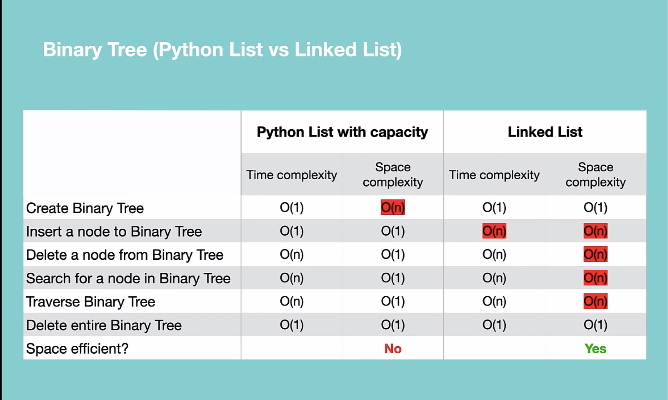